In [1]:
%config IPCompleter.use_jedi = False
import numpy as np
np.set_printoptions(precision=4)
from scipy import stats
import matplotlib.pyplot as plt
from pathlib import Path

fig_path = str(Path().absolute())+'/figures/hw1/'
print(fig_path)

/home/zpyang/grad_courses/2021_spring/ece595_ml/figures/hw1/


# Exercise 1

## 1 a)

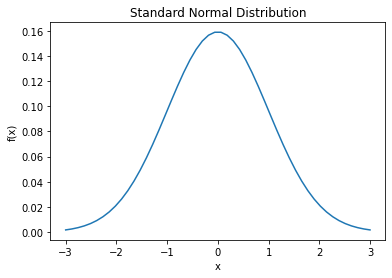

In [2]:
mu = 0
sigma = 1
f = lambda x:1/(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
x_vec = np.linspace(-3,3)

plt.figure()
plt.plot(x_vec, f(x_vec))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Standard Normal Distribution')
plt.savefig(fig_path+'hw1_ex1_a')

## 1 b)

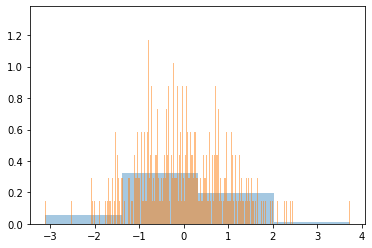

In [3]:
# i)
samples = np.random.normal(loc=0,scale=1,size=1000)

# ii)
plt.figure()
plt.hist(samples, density=True, bins=4, alpha=0.4);
plt.hist(samples, density=True, bins=1000, alpha=0.5);

In [4]:
# iii)
[mu, sigma] = stats.norm.fit(samples)
print("mu: "+str(mu)+"\nsigma: "+str(sigma))

mu: -0.058012454538228855
sigma: 0.9795421702404129


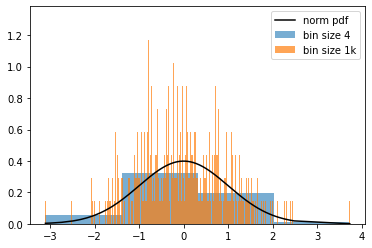

In [5]:
# iv)
samples = np.sort(samples)
p = stats.norm.pdf(samples)
plt.figure()
plt.hist(samples,density=True, bins=4, alpha=0.6, label='bin size 4')
plt.hist(samples,density=True, bins=1000, alpha=0.7, label='bin size 1k')
plt.plot(samples, p, color='k', label='norm pdf')
plt.legend(loc='best')
plt.savefig(fig_path+'hw1_ex1_b')

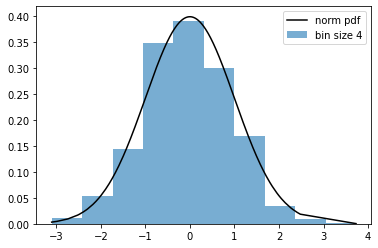

In [27]:
samples = np.sort(samples)
p = stats.norm.pdf(samples)
plt.figure()
plt.hist(samples,density=True, bins=10, alpha=0.6, label='bin size 4')
plt.plot(samples, p, color='k', label='norm pdf')
plt.legend(loc='best')
plt.savefig(fig_path+'quiz1_p1')

## 1 c)

m* and J*:  48.0 -0.2857747310956417


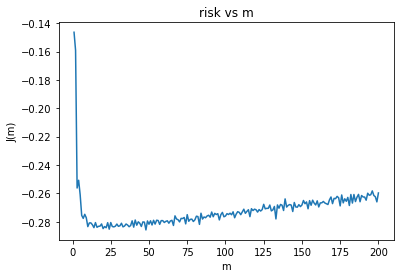

In [6]:
# i)
n = 1000
s_range = np.array([min(samples),max(samples)])
m_vec = np.linspace(1,200,200)
h = (s_range[1]-s_range[0])/m_vec

# def sum_implicit_prob(m_vec):
#     p_sum_vec = []
#     for mj in m_vec:
#         interval = [s_range[0]+(s_range[1]-s_range[0])/mj*j for j in range(int(mj)+1)]
#         cdf_vec = stats.norm.cdf(interval)
#         pj_vec = np.array([cdf_vec[i+1]-cdf_vec[i] for i in range(len(cdf_vec)-1)])
#         pj_sum = sum(pj_vec**2)
#         p_sum_vec.append(pj_sum)
#     return np.array(p_sum_vec)

def sum_implicit_prob(m_vec):
    p_sum_vec = []
    for mj in m_vec:
        hist, bins = np.histogram(samples, bins=int(mj))
        p_sum_vec.append(sum((hist/n)**2))
    return np.array(p_sum_vec)
    
J = lambda m: 2/(h*(n-1))-(n+1)/(h*(n-1))*sum_implicit_prob(m)
J_vec = J(m_vec)

m_star = m_vec[np.argmin(J_vec)]

print("m* and J*: ",m_star,min(J_vec))

plt.figure()
plt.plot(m_vec, J_vec)
plt.xlabel('m')
plt.ylabel('J(m)')
plt.title('risk vs m')
plt.savefig(fig_path+'hw1_ex1_ci')

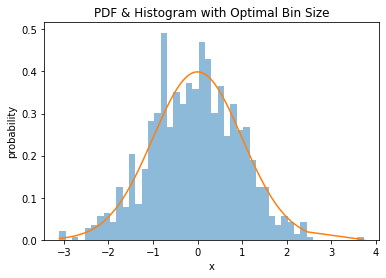

In [7]:
plt.figure()
plt.hist(samples, density=True, bins=int(m_star), alpha= 0.5)
plt.plot(samples, p)
plt.title("PDF & Histogram with Optimal Bin Size")
plt.xlabel('x')
plt.ylabel('probability')
plt.savefig(fig_path+'hw1_ex1_ciii')

# Exercise 2

## 2 a)


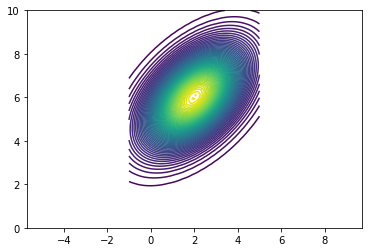

In [8]:
# ii)
# mu = np.array([[2],
#                [6]])
mu = np.array([
    [0],
    [0]
])

sigma = np.array([[2,1],[1,2]])
sigma_inv = np.linalg.inv(sigma)

fx = lambda x: 1/np.sqrt((2*np.pi)**2*np.linalg.det(sigma)) \
        *np.exp(-0.5*(x-mu).T @ sigma_inv @ (x-mu))

x1 = np.linspace(-1,5)
x2 = np.linspace(0,10)
X1, X2 = np.meshgrid(x1,x2)

FX = 1/(2*np.pi*np.sqrt(3))*np.exp(-1/6*(2*X1**2+4*X1-2*X1*X2+2*X2**2-20*X2+56))

plt.figure()
plt.contour(X1, X2, FX , levels=69)
plt.axis('equal')
plt.savefig(fig_path+'hw1_ex2_aii')

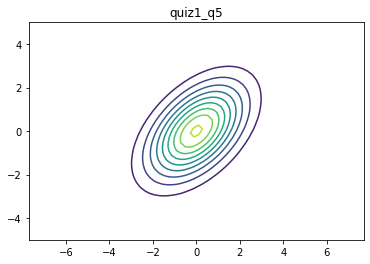

In [28]:
from scipy.stats import multivariate_normal

mu = np.array([0,0])

sigma = np.array([[2,1],[1,2]])

x1 = np.linspace(-5,5)
x2 = np.linspace(-5,5)
X1, X2 = np.meshgrid(x1,x2)

pos = np.empty(X1.shape + (2,))
pos[:,:,0] = X1
pos[:,:,1] = X2

F = multivariate_normal(mu,sigma)
Z = F.pdf(pos)
plt.figure()
plt.contour(X1, X2, Z , levels=10)
plt.axis('equal')
plt.title('quiz1_q5')
plt.savefig(fig_path+'quiz1_q5')

In [33]:
A = np.array([[-2,1],[1,-2]])
A @ A.T

array([[ 5, -4],
       [-4,  5]])

## 2 c)

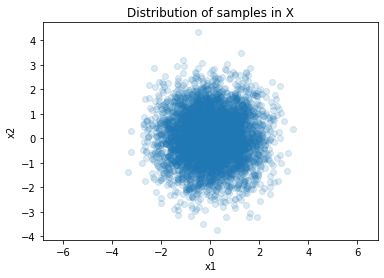

In [9]:
# i)
samples_std = np.random.multivariate_normal(np.array([0,0]),np.array([[1,0],[0,1]]),size=5000)
plt.figure()
plt.scatter(samples_std[:,0],samples_std[:,1], alpha=0.15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribution of samples in X')
plt.axis('equal')
plt.savefig(fig_path+'hw1_ex2_ci')

[[ 0.7071  1.2247]
 [-0.7071  1.2247]]


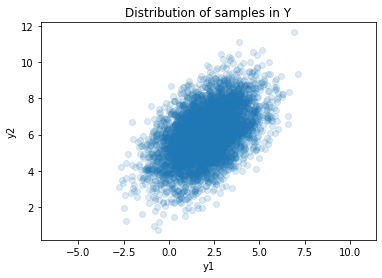

In [10]:
# ii)
A = np.array([[1/np.sqrt(2),np.sqrt(3/2)],[-1/np.sqrt(2),np.sqrt(3/2)]])
b = mu
samples_tf = A @ samples_std.T + b
print(A)
plt.figure()
plt.scatter(samples_tf[0,:],samples_tf[1,:], alpha=0.15)
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('Distribution of samples in Y')
plt.axis('equal')
plt.savefig(fig_path+'hw1_ex2_cii1')

[[3. 0.]
 [0. 1.]] [[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]
[[ 1.2247 -0.7071]
 [ 1.2247  0.7071]]


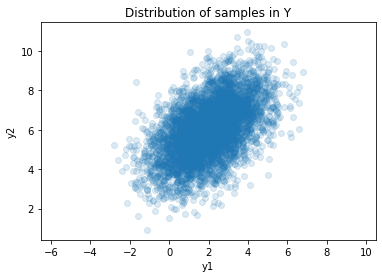

In [11]:
w,v = np.linalg.eig(sigma)
w = np.diag(w)
A_n = v @ np.sqrt(w)
print(w,v)
print(A_n)
samples_tf = A_n @ samples_std.T + b

plt.figure()
plt.scatter(samples_tf[0,:],samples_tf[1,:], alpha=0.15)
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('Distribution of samples in Y')
plt.axis('equal')
plt.savefig(fig_path+'hw1_ex2_cii2')

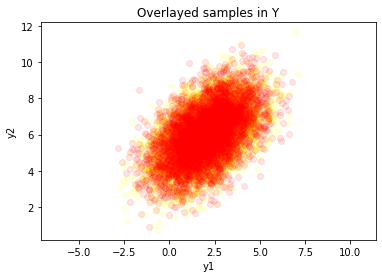

In [12]:
plt.figure()

samples_tf = A @ samples_std.T + b
plt.scatter(samples_tf[0,:],samples_tf[1,:], alpha=0.1, color='yellow')

samples_tf = A_n @ samples_std.T + b
plt.scatter(samples_tf[0,:],samples_tf[1,:], alpha=0.1, color='red')
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('Overlayed samples in Y')
plt.axis('equal')
plt.savefig(fig_path+'hw1_ex2_ciii')

#### Exercise 3

In [13]:
from scipy.special import eval_legendre
N = 50
x = np.linspace(-1,1,N)
L0 = eval_legendre(0,x)
L1 = eval_legendre(1,x)
L2 = eval_legendre(2,x)
L3 = eval_legendre(3,x)
L4 = eval_legendre(4,x)

## 3 a) b) c)

[ 0.1468 -2.2291 -3.7899  3.749   5.3789]


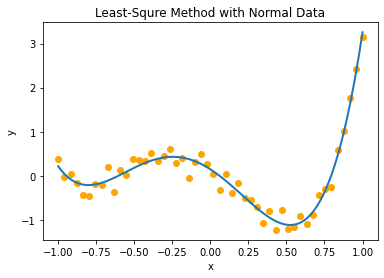

In [14]:
beta = np.array([-0.001, 0.01, 0.55, 1.5, 1.2])
y = beta[0]*L0 + beta[1]*L1 + beta[2]*L2 + beta[3]*L3 + beta[4]*L4 + 0.2*np.random.randn(N)

# X = np.column_stack((L0,L1,L2,L3,L4))
X = np.column_stack((x**0,x**1,x**2,x**3,x**4))

theta = np.linalg.lstsq(X, y, rcond=None)[0]
t     = np.linspace(-1, 1, 200);

T = np.column_stack((t**0,t**1,t**2,t**3,t**4))
yhat = theta @ T.T

print(theta)
plt.scatter(x,y, color='orange')
plt.plot(t,yhat, linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least-Squre Method with Normal Data')
plt.savefig(fig_path+'hw1_ex3_lstsqr_normal')

## 3 d)

[ 0.5609 -2.5472 -2.2717  4.4525  3.3114]


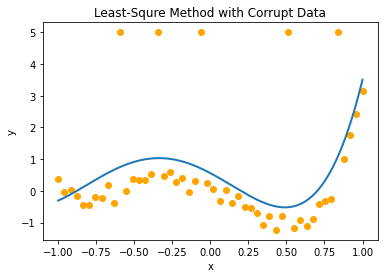

In [15]:
idx = [10,16,23,37,45]
y[idx] = 5

# X = np.column_stack((L0,L1,L2,L3,L4))
X = np.column_stack((x**0,x**1,x**2,x**3,x**4))

theta = np.linalg.lstsq(X, y, rcond=None)[0]
t     = np.linspace(-1, 1, 200);

T = np.column_stack((t**0,t**1,t**2,t**3,t**4))
yhat = theta @ T.T

print(theta)
plt.scatter(x,y,color='orange')
plt.plot(t,yhat, linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least-Squre Method with Corrupt Data')
plt.savefig(fig_path+'hw1_ex3_lstsqr_corrupt')

## 3 e) f)

In [16]:
from scipy.optimize import linprog

c = np.hstack([np.zeros((1,5)), np.ones((1,N))])
X = np.column_stack((x**0,x**1,x**2,x**3,x**4))
A = np.block([
    [X, -np.eye(N)],
    [-X, -np.eye(N)],
])
b = np.hstack([y,-y]).reshape(N*2,1)
result = linprog(A_ub=A, b_ub=b, c=c, bounds=(None,None))
beta_h = result.x[0:5]
beta_h

array([ 0.1802, -2.2582, -3.795 ,  3.816 ,  5.3461])

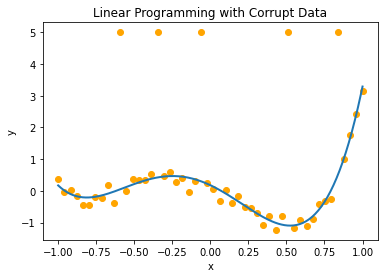

In [17]:
T = np.column_stack((t**0,t**1,t**2,t**3,t**4))
yhat = beta_h @ T.T

plt.scatter(x,y,color='orange')
plt.plot(t,yhat, linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Programming with Corrupt Data')
plt.savefig(fig_path+'hw1_ex3_linprog_corrupt')

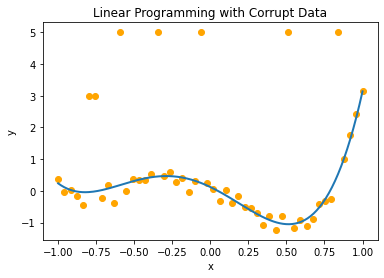

In [34]:
idx = [5, 6]
y[idx] = 3

from scipy.optimize import linprog

c = np.hstack([np.zeros((1,5)), np.ones((1,N))])
X = np.column_stack((x**0,x**1,x**2,x**3,x**4))
A = np.block([
    [X, -np.eye(N)],
    [-X, -np.eye(N)],
])
b = np.hstack([y,-y]).reshape(N*2,1)
result = linprog(A_ub=A, b_ub=b, c=c, bounds=(None,None))
beta_h = result.x[0:5]
beta_h

T = np.column_stack((t**0,t**1,t**2,t**3,t**4))
yhat = beta_h @ T.T

plt.scatter(x,y,color='orange')
plt.plot(t,yhat, linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Programming with Corrupt Data')
plt.savefig(fig_path+'quiz1_q9_linprog_corrupt')